# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
df = df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [28]:
# Checking the number of mice.
mice_count = df['Mouse ID'].nunique()
mice_count

249

In [29]:
# df=df.set_index('Mouse ID')
# df.loc['g989']

In [30]:
dupe = df.loc[df['Mouse ID']== 'g989']
dupe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_ID = df.loc[df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupe_ID

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe = df.loc[df['Mouse ID']== 'g989']
dupe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[df['Mouse ID'].isin(dupe_ID)==False]
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [34]:
# Checking the number of mice in the clean DataFrame.
mice_count = df['Mouse ID'].nunique()
mice_count

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).mean()
median = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).median()
var = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).var()
std = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).std()
sem = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).sem()

dr_summary = pd.DataFrame({'Mean Tumor Volume': mean,
                          'Median Tumor Volume': median,
                          'Tumor Volume Variance': var,
                          'Tumor Volume Std. Dev.': std,
                          'Tumor Volume Std. Err.': sem})
dr_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [37]:
reg = df.groupby(['Drug Regimen'])['Timepoint'].count()
# time_reg = time_reg.set_index(['Drug Regimen'])
reg 

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [38]:
reg = reg.sort_values(ascending=False)

## Bar and Pie Charts

TypeError: 'str' object is not callable

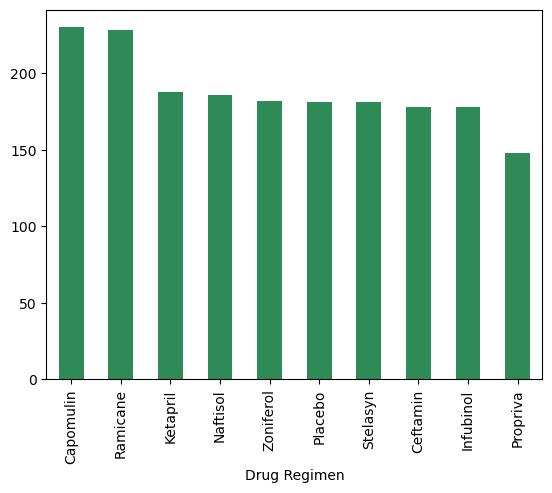

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

reg.plot(kind='bar', color='seagreen')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

plt.show()

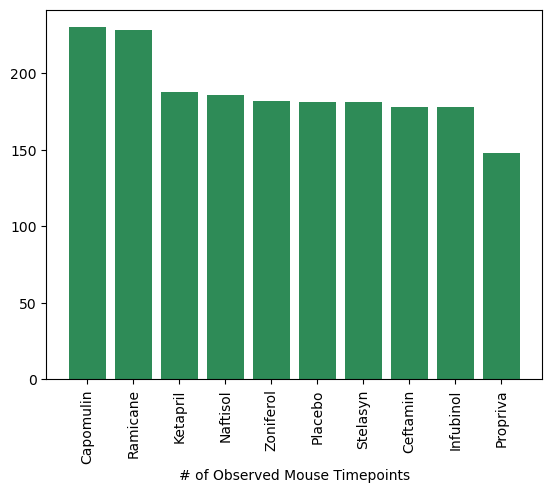

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = reg.index
y = reg.values
plt.xlabel("# of Observed Mouse Timepoints")

plt.xticks(rotation='vertical')
plt.bar(x, y, color = 'seagreen')

plt.show()

In [67]:
gender_distribution = df['Sex'].value_counts()
gender_distribution

Sex
Male      958
Female    922
Name: count, dtype: int64

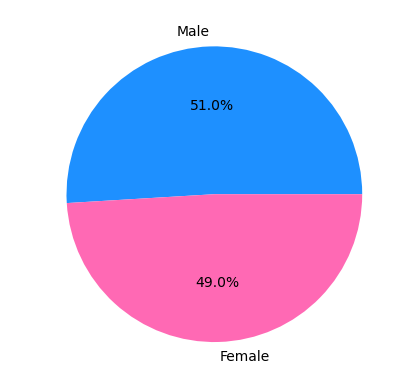

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors = ['dodgerblue', 'hotpink'], ylabel= '  ')
# plt.ylabel("Sex")
plt.show()

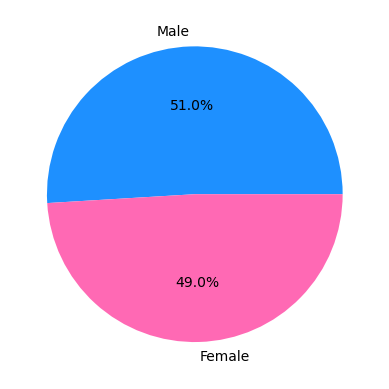

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['dodgerblue', 'hotpink'], )
plt.title = 'Gender'
plt.show()

In [45]:
# cap = df.loc[df['Drug Regimen']=='Capomulin']


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap = df.loc[df['Drug Regimen']=='Capomulin']
ram = df.loc[df['Drug Regimen']=='Ramicane']
inf = df.loc[df['Drug Regimen']=='Infubinol']
cef = df.loc[df['Drug Regimen']=='Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
cap_last = cap.groupby('Mouse ID').max()['Timepoint']
ram_last = ram.groupby('Mouse ID').max()['Timepoint']
inf_last = inf.groupby('Mouse ID').max()['Timepoint']
cef_last = cef.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clv = pd.DataFrame(cap_last)
rlv = pd.DataFrame(ram_last)
ilv = pd.DataFrame(inf_last)
celv = pd.DataFrame(cef_last)

cap_merged = pd.merge(clv, df, on=['Mouse ID', 'Timepoint'], how='left')
ram_merged = pd.merge(rlv, df, on=['Mouse ID', 'Timepoint'], how='left')
inf_merged = pd.merge(ilv, df, on=['Mouse ID', 'Timepoint'], how='left')
cef_merged = pd.merge(celv, df, on=['Mouse ID', 'Timepoint'], how='left')

cap_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [47]:
# Put treatments into a list for for loop (and later for plot labels)

drug_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

treatments = [cap_merged, ram_merged, inf_merged, cef_merged]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for label, x in zip(drug_labels, treatments):

    i = x['Tumor Volume (mm3)']
    
    tumor_vol.append(i)
    
    q = i.quantile([.25, .5, .75])
    lower = q[.25]
    upper = q[.75]
    iqr = upper - lower
    


    
    # Determine outliers using upper and lower bounds
    upper_bound = upper + (1.5*iqr)
    lower_bound = lower - (1.5*iqr)
    
# print(f'Capomulins potential outliers: {label}')
    outliers = i.loc[(i>upper_bound) | (i<lower_bound)]
    print(f'{label}s potential outliers: {outliers}')

Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


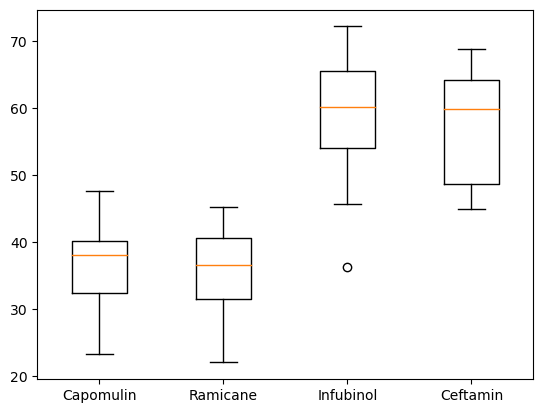

In [48]:
plt.boxplot(tumor_vol, labels=drug_labels,)
plt.ylabel='Tumor Volume (mm3)'
plt.show()

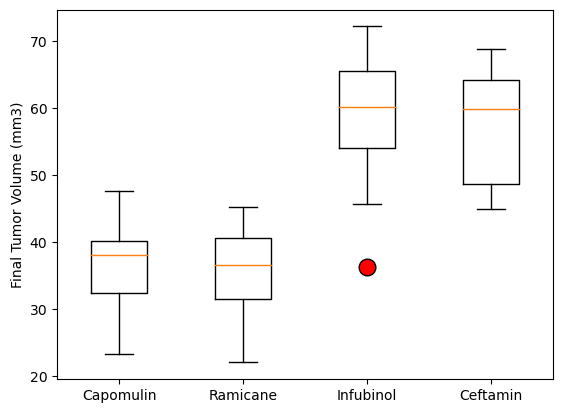

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=drug_labels)
plt.ylabel='Tumor Volume (mm3)'
plt.show()

Text(0.5, 0, 'Timepoint (Days)')

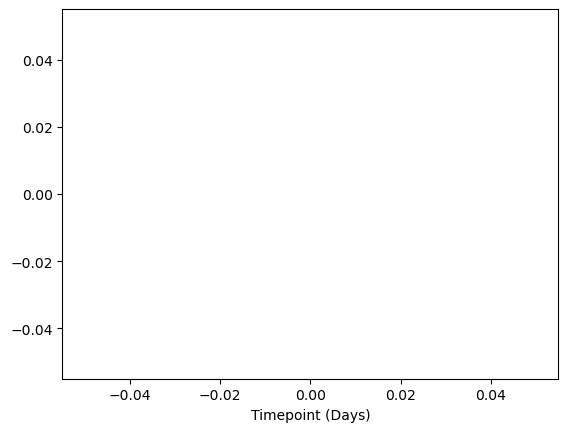

In [50]:
line = cap_merged.loc[cap_merged['Mouse ID']=='1509']
xx = line['Timepoint']
t = line['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()

plt.plot(xx,t)
plt.xlabel('Timepoint (Days)')



## Line and Scatter Plots

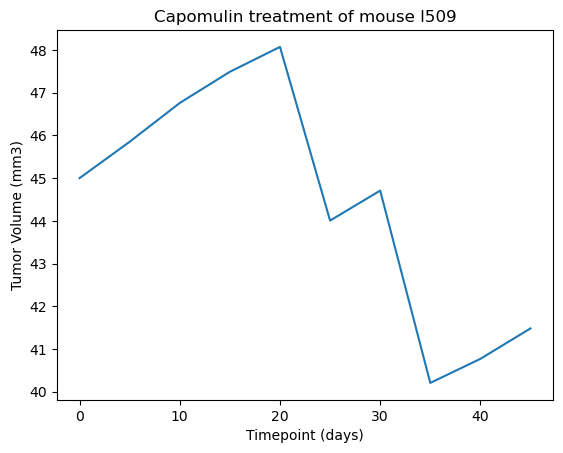

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [51]:
avcap_vol = cap.groupby(['Mouse ID']).mean()
avcap_vol

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

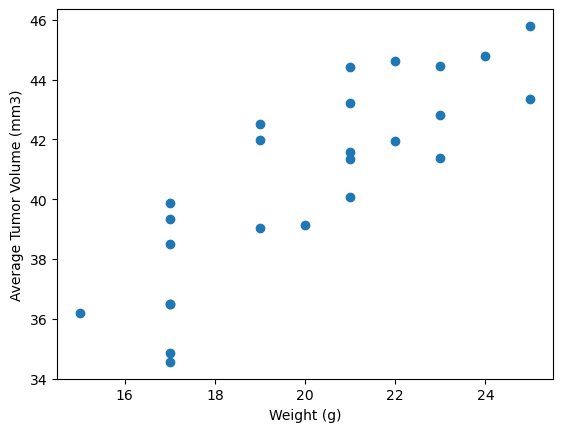

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avcap_vol = cap.groupby(['Mouse ID']).mean()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


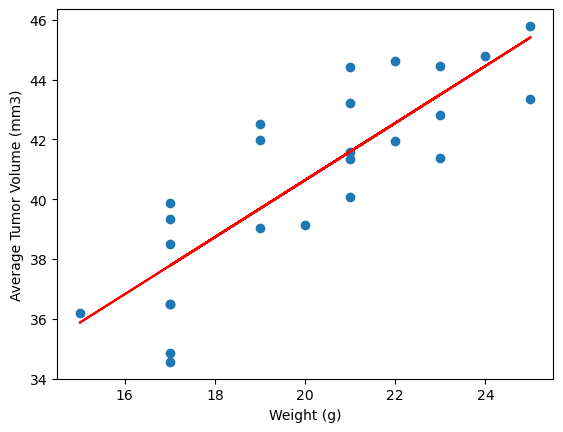

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
